In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from copy import deepcopy

In [108]:
# Pretty plots
import seaborn as sns
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set(font='serif', font_scale=1.4)
sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

def setup_plot():
    fig = plt.figure(dpi=100, figsize=(5.0,3.0))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 15)
    ax.tick_params(direction='in')

In [121]:
bc_J_denoised = np.stack(np.load("./data/bc_J_denoised.npz", allow_pickle=True)["arr_0"], axis=0)
residuil_J_denoised = np.stack(np.load("./data/residuil_J_denoised.npz", allow_pickle=True)["arr_0"], axis=0)
doubil_J_denoised = np.stack(np.load("./data/doubil_J_denoised.npz", allow_pickle=True)["arr_0"], axis=0)

bc_J_noisy = np.stack(np.load("./data/bc_J_noisy.npz", allow_pickle=True)["arr_0"], axis=0)
residuil_J_noisy = np.stack(np.load("./data/residuil_J_noisy.npz", allow_pickle=True)["arr_0"], axis=0)
doubil_J_noisy = np.stack(np.load("./data/doubil_J_noisy.npz", allow_pickle=True)["arr_0"], axis=0)

bc_mse_denoised = np.stack(np.load("./data/bc_mse_denoised.npz", allow_pickle=True)["arr_0"], axis=0)
residuil_mse_denoised = np.stack(np.load("./data/residuil_mse_denoised.npz", allow_pickle=True)["arr_0"], axis=0)
doubil_mse_denoised = np.stack(np.load("./data/doubil_mse_denoised.npz", allow_pickle=True)["arr_0"], axis=0)

bc_mse_noisy = np.stack(np.load("./data/bc_mse_noisy.npz", allow_pickle=True)["arr_0"], axis=0)
residuil_mse_noisy = np.stack(np.load("./data/residuil_mse_noisy.npz", allow_pickle=True)["arr_0"], axis=0)
doubil_mse_noisy = np.stack(np.load("./data/doubil_mse_noisy.npz", allow_pickle=True)["arr_0"], axis=0)

In [122]:
print(len(doubil_J_denoised))

5


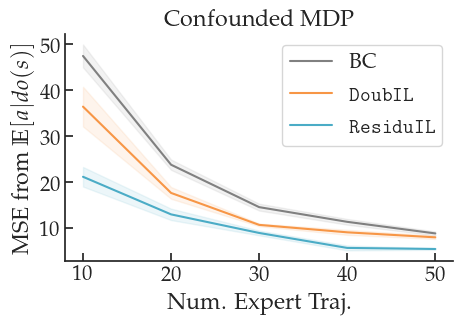

In [123]:
setup_plot()
plt.xlabel("Num. Expert Traj.")
plt.ylabel("MSE from $\\mathbb{E}[a|do(s)]$")
plt.title("Confounded MDP")
plt.plot(np.arange(10, 51, 10), bc_mse_noisy.mean(axis=0), label="BC", color="gray")
plt.fill_between(np.arange(10, 51, 10),
                 bc_mse_noisy.mean(axis=0) - (bc_mse_noisy.std(axis=0) / np.sqrt(len(bc_mse_noisy))),
                 bc_mse_noisy.mean(axis=0) + (bc_mse_noisy.std(axis=0) / np.sqrt(len(bc_mse_noisy))),
                 color = "gray",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), doubil_mse_noisy.mean(axis=0), label="$\\texttt{DoubIL}$", color="#F79646")
plt.fill_between(np.arange(10, 51, 10),
                 doubil_mse_noisy.mean(axis=0) - (doubil_mse_noisy.std(axis=0) / np.sqrt(len(doubil_mse_noisy))),
                 doubil_mse_noisy.mean(axis=0) + (doubil_mse_noisy.std(axis=0) / np.sqrt(len(doubil_mse_noisy))),
                 color = "#F79646",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), residuil_mse_noisy.mean(axis=0), label="$\\texttt{ResiduIL}$", color="#4BACC6")
plt.fill_between(np.arange(10, 51, 10),
                 residuil_mse_noisy.mean(axis=0) - (residuil_mse_noisy.std(axis=0) / np.sqrt(len(residuil_mse_noisy))),
                 residuil_mse_noisy.mean(axis=0) + (residuil_mse_noisy.std(axis=0) / np.sqrt(len(residuil_mse_noisy))),
                 color = "#4BACC6",
                 alpha = 0.1)
plt.legend(ncol=1, loc="upper right", fontsize=15)
plt.savefig("figs/cnfnd_mse.pdf", bbox_inches='tight')

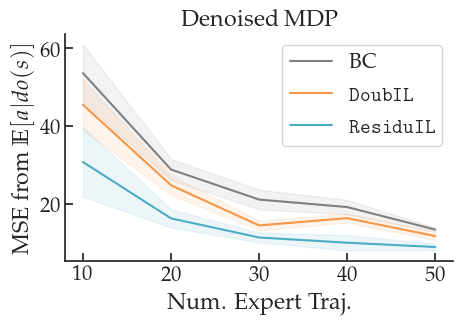

In [124]:
setup_plot()
plt.xlabel("Num. Expert Traj.")
plt.ylabel("MSE from $\\mathbb{E}[a|do(s)]$")
plt.title("Denoised MDP")
plt.plot(np.arange(10, 51, 10), bc_mse_denoised.mean(axis=0), label="BC", color="gray")
plt.fill_between(np.arange(10, 51, 10),
                 bc_mse_denoised.mean(axis=0) - (bc_mse_denoised.std(axis=0) / np.sqrt(len(bc_mse_denoised))),
                 bc_mse_denoised.mean(axis=0) + (bc_mse_denoised.std(axis=0) / np.sqrt(len(bc_mse_denoised))),
                 color = "gray",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), doubil_mse_denoised.mean(axis=0), label="$\\texttt{DoubIL}$", color="#F79646")
plt.fill_between(np.arange(10, 51, 10),
                 doubil_mse_denoised.mean(axis=0) - (doubil_mse_denoised.std(axis=0) / np.sqrt(len(doubil_mse_denoised))),
                 doubil_mse_denoised.mean(axis=0) + (doubil_mse_denoised.std(axis=0) / np.sqrt(len(doubil_mse_denoised))),
                 color = "#F79646",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), residuil_mse_denoised.mean(axis=0), label="$\\texttt{ResiduIL}$", color="#4BACC6")
plt.fill_between(np.arange(10, 51, 10),
                 residuil_mse_denoised.mean(axis=0) - (residuil_mse_denoised.std(axis=0) / np.sqrt(len(residuil_mse_denoised))),
                 residuil_mse_denoised.mean(axis=0) + (residuil_mse_denoised.std(axis=0) / np.sqrt(len(residuil_mse_denoised))),
                 color = "#4BACC6",
                 alpha = 0.1)
plt.legend(ncol=1, loc="upper right", fontsize=15)
plt.savefig("figs/uncnfnd_mse.pdf", bbox_inches='tight')

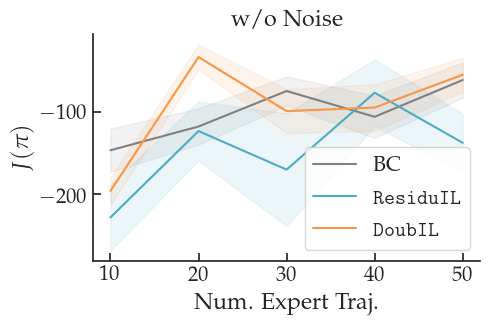

In [125]:
setup_plot()
plt.xlabel("Num. Expert Traj.")
plt.ylabel("$J(\pi)$")
plt.title("w/o Noise")
plt.plot(np.arange(10, 51, 10), bc_J_noisy.mean(axis=0), label="BC", color="gray")
plt.fill_between(np.arange(10, 51, 10),
                 bc_J_noisy.mean(axis=0) - (bc_J_noisy.std(axis=0) / np.sqrt(len(bc_J_noisy))),
                 bc_J_noisy.mean(axis=0) + (bc_J_noisy.std(axis=0) / np.sqrt(len(bc_J_noisy))),
                 color = "gray",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), residuil_J_noisy.mean(axis=0), label="$\\texttt{ResiduIL}$", color="#4BACC6")
plt.fill_between(np.arange(10, 51, 10),
                 residuil_J_noisy.mean(axis=0) - (residuil_J_noisy.std(axis=0) / np.sqrt(len(residuil_J_noisy))),
                 residuil_J_noisy.mean(axis=0) + (residuil_J_noisy.std(axis=0) / np.sqrt(len(residuil_J_noisy))),
                 color = "#4BACC6",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), doubil_J_noisy.mean(axis=0), label="$\\texttt{DoubIL}$", color="#F79646")
plt.fill_between(np.arange(10, 51, 10),
                 doubil_J_noisy.mean(axis=0) - (doubil_J_noisy.std(axis=0) / np.sqrt(len(doubil_J_noisy))),
                 doubil_J_noisy.mean(axis=0) + (doubil_J_noisy.std(axis=0) / np.sqrt(len(doubil_J_noisy))),
                 color = "#F79646",
                 alpha = 0.1)
plt.legend()
plt.show()

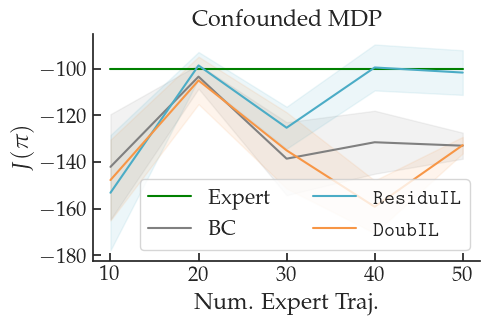

In [126]:
setup_plot()
plt.xlabel("Num. Expert Traj.")
plt.ylabel("$J(\pi)$")
plt.title("Confounded MDP")
plt.plot(np.arange(10, 51, 10), [-100] * 5, label="Expert", color="#008000")
plt.plot(np.arange(10, 51, 10), bc_J_denoised.mean(axis=0), label="BC", color="gray")
plt.fill_between(np.arange(10, 51, 10),
                 bc_J_denoised.mean(axis=0) - (bc_J_denoised.std(axis=0) / np.sqrt(len(bc_J_denoised))),
                 bc_J_denoised.mean(axis=0) + (bc_J_denoised.std(axis=0) / np.sqrt(len(bc_J_denoised))),
                 color = "gray",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), residuil_J_denoised.mean(axis=0), label="$\\texttt{ResiduIL}$", color="#4BACC6")
plt.fill_between(np.arange(10, 51, 10),
                 residuil_J_denoised.mean(axis=0) - (residuil_J_denoised.std(axis=0) / np.sqrt(len(residuil_J_denoised))),
                 residuil_J_denoised.mean(axis=0) + (residuil_J_denoised.std(axis=0) / np.sqrt(len(residuil_J_denoised))),
                 color = "#4BACC6",
                 alpha = 0.1)
plt.plot(np.arange(10, 51, 10), doubil_J_denoised.mean(axis=0), label="$\\texttt{DoubIL}$", color="#F79646")
plt.fill_between(np.arange(10, 51, 10),
                 doubil_J_denoised.mean(axis=0) - (doubil_J_denoised.std(axis=0) / np.sqrt(len(doubil_J_denoised))),
                 doubil_J_denoised.mean(axis=0) + (doubil_J_denoised.std(axis=0) / np.sqrt(len(doubil_J_denoised))),
                 color = "#F79646",
                 alpha = 0.1)
plt.legend(ncol=2)
plt.show()

In [84]:
bc_mse_noisy.mean(axis=0)

array([47.4671866 , 23.83858274, 14.62717379, 11.43628376,  8.9166252 ])

In [85]:
residuil_mse_noisy.mean(axis=0)

array([21.2209837 , 13.05326235,  9.01750222,  5.76787384,  5.53568922])

In [120]:
doubil_mse_noisy

array([[30.74493547, 16.97300705,  9.67825574,  8.0499758 ,  7.79797467]])